In [1]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas as pd
import os 

In [2]:
cwd = os.chdir("/Users/ArgonLab/Documents")



In [3]:
df = pd.read_csv('kula3_muscovite_trace.csv', engine = 'python')

In [4]:
df.tail()

,Unnamed: 0,ea1,ea2,phi__0,phi__1,d01,d02,a1,a2,mu1_trace__0,...,Age_Model__4,Age_Model__5,Age_Model__6,Age_Model__7,Age_Model__8,Age_Model__9,Age_Model__10,Age_Model__11,Age_Model__12,Age_Model__13
2495,2495,239.190753,233.582048,0.260673,0.739327,49.176497,37.357352,0.004714,0.005605,0.259956,...,92.215266,92.220596,92.205506,92.168409,92.211969,92.040933,91.674058,91.095843,89.695480,80.094506
2496,2496,238.158084,230.176394,0.270129,0.729871,49.428678,39.006222,0.004458,0.006617,0.283431,...,94.201578,94.112568,94.010853,93.264293,93.847547,93.322383,92.359009,91.064282,88.612706,84.268369
2497,2497,239.610935,233.131808,0.257428,0.742572,54.204907,57.766029,0.004477,0.006475,0.252523,...,93.250212,93.288656,93.292350,93.337261,93.264095,93.113507,92.746591,92.118616,90.493027,78.578675
2498,2498,241.177738,235.065704,0.272643,0.727357,52.255550,62.562208,0.004453,0.006691,0.267639,...,92.400492,92.436240,92.445124,92.438903,92.463670,92.377675,92.151322,91.746573,90.655212,79.808330
2499,2499,240.817583,235.006774,0.288604,0.711396,42.980100,59.753557,0.004546,0.007085,0.279133,...,91.740101,91.811786,91.850841,91.885464,93.138695,91.915912,91.920086,91.832894,91.420125,77.327256


In [5]:
# PLotting Data Frame
dfp = pd.DataFrame({"age1":df['age1'].values, 
                   "age2": df['age2'].values, 
                    "d01":df['d01'].values, 
                   "d02":df['d02'].values,
                   "ea1":df['ea1'].values, 
                   "ea2":df['ea2'].values
                   })

In [6]:
dfp.head()

,age1,age2,d01,d02,ea1,ea2
0,136.006347,78.911070,42.967500,37.304552,233.433790,232.417479
1,124.621408,82.927023,46.937365,39.674567,233.754869,231.522654
2,125.326136,85.113216,50.156900,39.469814,233.125098,232.327891
3,128.566648,82.962404,47.834769,34.665925,232.719715,229.608758
4,133.047482,83.154503,60.076064,35.940670,235.210522,229.581220


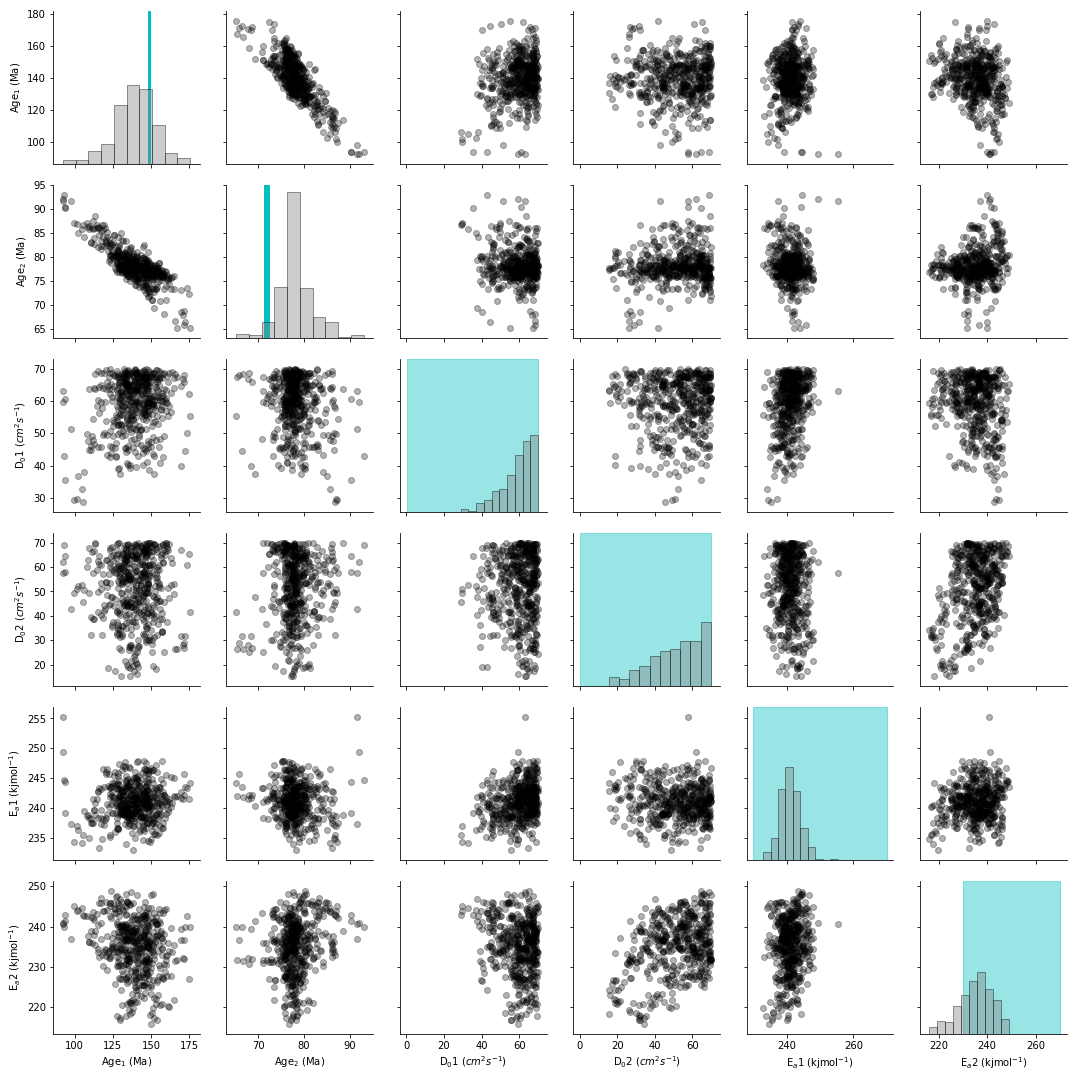

In [14]:
g = sns.PairGrid(dfp[-500:])
g = g.map_diag(plt.hist, facecolor = 'grey', edgecolor = 'k', 
              alpha = 0.4)
g = g.map_offdiag(plt.scatter, alpha = 0.3, color = 'k')


# Y_AXIS LABELS

g.axes[0,0].set_ylabel('Age$_1$ (Ma)')
g.axes[1,0].set_ylabel('Age$_2$ (Ma)')
g.axes[2,0].set_ylabel('D$_0$1 ($cm^{2}s^{-1}$)')
g.axes[3,0].set_ylabel('D$_0$2 ($cm^{2}s^{-1}$)')
g.axes[4,0].set_ylabel('E$_a$1 (kjmol$^{-1}$)')
g.axes[5,0].set_ylabel('E$_a$2 (kjmol$^{-1}$)')



# X_AXIS LABELS

g.axes[5,0].set_xlabel('Age$_1$ (Ma)')
g.axes[5,1].set_xlabel('Age$_2$ (Ma)')
g.axes[5,2].set_xlabel('D$_0$1 ($cm^{2}s^{-1}$)')
g.axes[5,3].set_xlabel('D$_0$2 ($cm^{2}s^{-1}$)')
g.axes[5,4].set_xlabel('E$_a$1 (kjmol$^{-1}$)')
g.axes[5,5].set_xlabel('E$_a$2 (kjmol$^{-1}$)')

g.axes[1,1].axvspan(71.25, 72.45 , color = 'c')
g.axes[0,0].axvspan(148, 149.64 , color = 'c')
g.axes[2,2].axvspan(0.1, 70, color = 'c', alpha = 0.4)
g.axes[3,3].axvspan(0.1, 70, color = 'c', alpha = 0.4)
g.axes[4,4].axvspan(230, 270, color = 'c', alpha = 0.4)
g.axes[5,5].axvspan(230, 270, color = 'c', alpha = 0.4)




plt.savefig('kula3_pairgrid.pdf')

In [13]:
import numpy as np
print(dfp['age1'].mean(axis = 0))
print(dfp['age2'].mean(axis = 0))
print(2*np.std(dfp['age1']))
print(2*np.std(dfp['age2']))

140.84623290215035
78.08848172884207
25.819742512613345
6.352363129459361


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


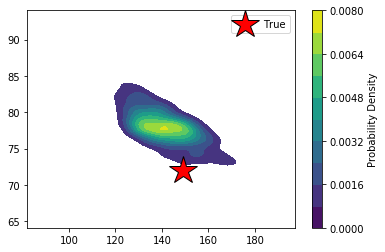

In [9]:
age1a = dfp['age1'].values
age2a = dfp['age2'].values
sns.kdeplot(age1a[::3], age2a[::3], shade = True, shade_lowest = False, 
           cbar = True, 
           cmap = 'viridis', 
           cbar_kws = {"label": "Probability Density"})
plt.plot(148.85, 72, '*', 
        color = 'r', markersize = 29, 
        markeredgecolor = 'k', 
        label = 'True')
plt.legend()
#plt.ylim(70, 83)
#plt.xlim(130, 175)